In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import collections
from operator import itemgetter
from sklearn import preprocessing
from sklearn import utils
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score



%matplotlib inline
sb.set()

## IMPORTING AND CLEANING DATASET

In [2]:
#IMPORTING ANIME.CSV

animeDF = pd.read_csv('anime.csv')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (19,20,21,22,23,24,25,26,27,28,48,49,50,51,52,53,54,55,58,59,60,67,68,69,70,71,72,73,74,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
animeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 99 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   MAL_ID                 17562 non-null  int64 
 1   Name                   17562 non-null  object
 2   Score                  17562 non-null  object
 3   Genres                 17562 non-null  object
 4   Genre 1                17562 non-null  object
 5   Genre2                 13270 non-null  object
 6   Genre 2                13270 non-null  object
 7   Genre3                 9029 non-null   object
 8   Genre 3                9029 non-null   object
 9   Genre4                 5534 non-null   object
 10  Genre 4                5534 non-null   object
 11  Genre5                 2959 non-null   object
 12  Genre 5                2959 non-null   object
 13  Genre6                 1237 non-null   object
 14  Genre 6                1237 non-null   object
 15  Genre7             

In [4]:
#REMOVING UNWANTED COLUMNS

animeDF = animeDF.drop(columns = ['Japanese name', 'Premiered', 'Members', 'Favorites', 'Popularity', 'Watching', 'Plan to Watch', 'Producers', 'Producer 1', 'Producer 2', 'Producer 3', 'Producer 4', 'Producer 5', 'Producer 6', 'Producer 7', 'Producer 8', 'Producer 9', 'Producer 10', 'Producer 11', 'Producer 12', 'Producer 13', 'Producer 14', 'Producer 15', 'Producer 16', 'Producer 17', 'Producer 18', 'Producer 19', 'Producer 20', 'Licensors', 'Licensor 1', 'Licensor 2', 'Licensor 3', 'Licensor 4', 'Genre2', 'Genre3', 'Genre4', 'Genre5', 'Genre6', 'Genre7', 'Genre8', 'Genre9', 'Genre10', 'Genre11', 'Genre12', 'Genre13', 'Studio2', 'Studio3', 'Studio4', 'Studio5', 'Studio6', 'Studio7'])

In [5]:
#CLEANED
animeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   MAL_ID                 17562 non-null  int64 
 1   Name                   17562 non-null  object
 2   Score                  17562 non-null  object
 3   Genres                 17562 non-null  object
 4   Genre 1                17562 non-null  object
 5   Genre 2                13270 non-null  object
 6   Genre 3                9029 non-null   object
 7   Genre 4                5534 non-null   object
 8   Genre 5                2959 non-null   object
 9   Genre 6                1237 non-null   object
 10  Genre 7                439 non-null    object
 11  Genre 8                143 non-null    object
 12  Genre 9                58 non-null     object
 13  Genre 10               21 non-null     object
 14  Genre 11               7 non-null      object
 15  Genre 12           

## EXPLORATORY DATA ANALYSIS

## Finding which studios produced the most anime (Top 20)

In [6]:
#WHICH STUDIO PRODUCED THE MOST ANIME?

animeDF['Studio 1'].isna().sum() #checking for NaN values

0

In [7]:
#REMOVING UNKNOWN VALUES IN STUDIOS

StudiosDF = animeDF[animeDF['Studio 1'] != 'Unknown']#REMOVING UNKNOWN VALUES IN STUDIOS
StudiosDF['Studios'].describe()

count              10483
unique              1089
top       Toei Animation
freq                 755
Name: Studios, dtype: object

In [8]:
#PRINTING OUT ALL UNIQUE STUDIOS

n = 1000
StudiosDF['Studio 1'].value_counts()[:n].index.tolist()

['Toei Animation',
 'Sunrise',
 'J.C.Staff',
 'Madhouse',
 'Production I.G',
 'TMS Entertainment',
 'Studio Deen',
 'Studio Pierrot',
 'OLM',
 'Nippon Animation',
 'A-1 Pictures',
 'Shin-Ei Animation',
 'DLE',
 'Tatsunoko Production',
 'Gonzo',
 'AIC',
 'Bones',
 'Xebec',
 'Shaft',
 'Kyoto Animation',
 'SILVER LINK.',
 'Satelight',
 "Brain's Base",
 'Doga Kobo',
 'Gainax',
 'Arms',
 'Production Reed',
 'Studio 4°C',
 'Seven',
 'Zexcs',
 'feel.',
 'ufotable',
 'Group TAC',
 'MAPPA',
 'Kachidoki Studio',
 'Lerche',
 'Haoliners Animation League',
 'Gallop',
 'Wit Studio',
 'Studio Ghibli',
 'P.A. Works',
 'Diomedéa',
 'Studio Hibari',
 'LIDENFILMS',
 'T-Rex',
 'PoRO',
 'Actas',
 'Artland',
 'TNK',
 'Tokyo Movie Shinsha',
 'Kinema Citrus',
 '8bit',
 'Studio Gokumi',
 'Ajia-Do',
 'Eiken',
 'Magic Bus',
 'Studio Comet',
 'Tezuka Productions',
 'SANZIGEN',
 'White Fox',
 'Gathering',
 'Asahi Production',
 'SynergySP',
 'Mushi Production',
 'Bandai Namco Pictures',
 'Polygon Pictures',
 'David

In [9]:
#FINDING TOP 20 STUDIOS IN STUDIO 1

n = 20
Top20_S1 = StudiosDF['Studio 1'].value_counts()[:n].to_dict() #ADDING TO A DICT
print(Top20_S1)

{'Toei Animation': 768, 'Sunrise': 499, 'J.C.Staff': 380, 'Madhouse': 356, 'Production I.G': 325, 'TMS Entertainment': 293, 'Studio Deen': 273, 'Studio Pierrot': 263, 'OLM': 224, 'Nippon Animation': 216, 'A-1 Pictures': 204, 'Shin-Ei Animation': 169, 'DLE': 167, 'Tatsunoko Production': 160, 'Gonzo': 140, 'AIC': 140, 'Bones': 137, 'Xebec': 135, 'Shaft': 123, 'Kyoto Animation': 123}


In [10]:
#FINDING TOP 20 STUDIOS IN STUDIO 2

n = 20
Top20_S2 = StudiosDF['Studio 2'].value_counts()[:n].to_dict() #ADDING TO A DICT
print(Top20_S2)

{'Xebec': 20, 'Production Reed': 18, 'LIDENFILMS': 17, 'Studio Deen': 14, 'Lesprit': 13, 'animate Film': 11, 'OLM': 11, 'Tatsunoko Production': 10, 'DMM.futureworks': 10, 'Studio Live': 10, 'Artmic': 10, 'Toei Animation': 9, 'Production I.G': 9, 'Zexcs': 9, 'Connect': 8, 'Shin-Ei Animation': 8, 'TNK': 8, 'Graphinica': 7, 'DLE': 7, 'AXsiZ': 7}


In [11]:
#FINDING TOP 20 STUDIOS IN STUDIO 3

n = 20
Top20_S3 = StudiosDF['Studio 3'].value_counts()[:n].to_dict() #ADDING TO A DICT
print(Top20_S3)

{'animate Film': 4, 'CloverWorks': 2, 'REALTHING': 2, 'OLM': 2, 'TMS Entertainment': 1, 'Sprite Animation Studios': 1, 'Studio Blanc': 1, 'Shaft': 1, 'XFLAG': 1, 'Welz Animation Studios': 1, 'Studio Colorido': 1, 'Connect': 1, 'FOREST Hunting One': 1, 'Zero-G': 1, 'Assez Finaud Fabric': 1, 'Studio 4°C': 1, 'Production GoodBook': 1, 'Signal.MD': 1, 'I.Gzwei': 1, 'Revoroot': 1}


In [12]:
#FINDING TOP 20 STUDIOS IN STUDIO 4

n = 20
Top20_S4 = StudiosDF['Studio 4'].value_counts()[:n].to_dict() #ADDING TO A DICT
print(Top20_S4)

{'Madhouse': 1, 'Studio 4°C': 1, 'Toei Animation': 1, 'DLE': 1}


In [13]:
#FINDING TOP 20 STUDIOS IN STUDIO 5

n = 20
Top20_S5 = StudiosDF['Studio 5'].value_counts()[:n].to_dict() #ADDING TO A DICT
print(Top20_S5)

{'Studio 4°C': 1}


In [14]:
#FINDING TOP 20 STUDIOS IN STUDIO 6

n = 20
Top20_S6 = StudiosDF['Studio 6'].value_counts()[:n].to_dict() #ADDING TO A DICT
print(Top20_S6)

{'Satelight': 1}


In [15]:
#FINDING TOP 20 STUDIOS IN STUDIO 7

n = 20
Top20_S7 = StudiosDF['Studio 7'].value_counts()[:n].to_dict() #ADDING TO A DICT
print(Top20_S7)

{'CoMix Wave Films': 1}


In [16]:
Studio1_counter = collections.Counter(Top20_S1)
Studio2_counter = collections.Counter(Top20_S2)
Studio3_counter = collections.Counter(Top20_S3)
Studio4_counter = collections.Counter(Top20_S4)
Studio5_counter = collections.Counter(Top20_S5)
Studio6_counter = collections.Counter(Top20_S6)
Studio7_counter = collections.Counter(Top20_S7)

add_dict = Studio1_counter + Studio2_counter + Studio3_counter + Studio4_counter + Studio5_counter + Studio6_counter + Studio7_counter

Top20 = dict(add_dict)
print(Top20)

{'Toei Animation': 778, 'Sunrise': 499, 'J.C.Staff': 380, 'Madhouse': 357, 'Production I.G': 334, 'TMS Entertainment': 294, 'Studio Deen': 287, 'Studio Pierrot': 263, 'OLM': 237, 'Nippon Animation': 216, 'A-1 Pictures': 204, 'Shin-Ei Animation': 177, 'DLE': 175, 'Tatsunoko Production': 170, 'Gonzo': 140, 'AIC': 140, 'Bones': 137, 'Xebec': 155, 'Shaft': 124, 'Kyoto Animation': 123, 'Production Reed': 18, 'LIDENFILMS': 17, 'Lesprit': 13, 'animate Film': 15, 'DMM.futureworks': 10, 'Studio Live': 10, 'Artmic': 10, 'Zexcs': 9, 'Connect': 9, 'TNK': 8, 'Graphinica': 7, 'AXsiZ': 7, 'CloverWorks': 2, 'REALTHING': 2, 'Sprite Animation Studios': 1, 'Studio Blanc': 1, 'XFLAG': 1, 'Welz Animation Studios': 1, 'Studio Colorido': 1, 'FOREST Hunting One': 1, 'Zero-G': 1, 'Assez Finaud Fabric': 1, 'Studio 4°C': 3, 'Production GoodBook': 1, 'Signal.MD': 1, 'I.Gzwei': 1, 'Revoroot': 1, 'Satelight': 1, 'CoMix Wave Films': 1}


In [17]:
#GETTING THE TOP 20 STUDIOS IN TERMS OF NO. OF ANIME PRODUCED 

n = 20
Top20_Studios = dict(sorted(Top20.items(), key = itemgetter(1), reverse = True)[:n])
print(Top20_Studios)

{'Toei Animation': 778, 'Sunrise': 499, 'J.C.Staff': 380, 'Madhouse': 357, 'Production I.G': 334, 'TMS Entertainment': 294, 'Studio Deen': 287, 'Studio Pierrot': 263, 'OLM': 237, 'Nippon Animation': 216, 'A-1 Pictures': 204, 'Shin-Ei Animation': 177, 'DLE': 175, 'Tatsunoko Production': 170, 'Xebec': 155, 'Gonzo': 140, 'AIC': 140, 'Bones': 137, 'Shaft': 124, 'Kyoto Animation': 123}


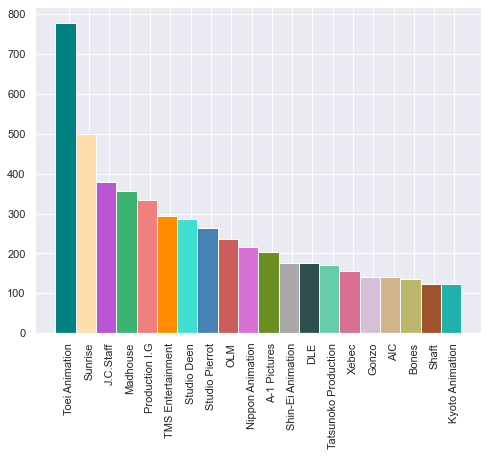

In [18]:
#HIST PLOT FOR TOP 20 STUDIOS

fig = plt.figure(figsize=(8,6)) #sets a different size (inches wide, inches tall)
ax = plt.subplot(111)
c = ['teal', 'navajowhite', 'mediumorchid', 'mediumseagreen', 'lightcoral','darkorange', 'turquoise', 'steelblue',
     'indianred', 'orchid','olivedrab', 'darkgrey', 'darkslategray', 'mediumaquamarine',
     'palevioletred', 'thistle', 'tan','darkkhaki', 'sienna', 'lightseagreen']

width=2.0
ax.bar(range(0,len(Top20_Studios.keys())), Top20_Studios.values(), width=width/2, color = c)
ax.set_xticks(np.arange(0,len(Top20_Studios.keys())) + width/12)
ax.set_xticklabels(Top20_Studios.keys())

locs, labels = plt.xticks() #gets labels
plt.setp(labels, rotation=90) #sets rotation of the labels

plt.show()

In [19]:
#DISPLAYING THE COUNTS 

top20DF = pd.DataFrame.from_dict(Top20_Studios, orient='index')
top20DF.rename(columns = {0: 'Count'}, inplace = True)

top20DF

,Count
Toei Animation,778
Sunrise,499
J.C.Staff,380
Madhouse,357
Production I.G,334
TMS Entertainment,294
Studio Deen,287
Studio Pierrot,263
OLM,237
Nippon Animation,216


## ANALYSIS OF STUDIOS

In [20]:
#IMPORTING ANIME.CSV

animeDF = pd.read_csv('anime.csv')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (19,20,21,22,23,24,25,26,27,28,48,49,50,51,52,53,54,55,58,59,60,67,68,69,70,71,72,73,74,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
studiosDF = animeDF[['Studio 1','Completion Percentage']]
studiosDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Studio 1               17562 non-null  object
 1   Completion Percentage  17562 non-null  object
dtypes: object(2)
memory usage: 274.5+ KB


In [22]:
studiosDFClean = studiosDF[studiosDF['Studio 1'] != 'Unknown'] #REMOVING UNKNOWN VALUES IN STUDIOS

In [23]:
studiosDFClean = studiosDFClean[studiosDFClean['Completion Percentage'] != '#DIV/0!'] 

In [24]:
studiosDFClean['Completion Percentage'] = pd.to_numeric(studiosDFClean['Completion Percentage'])

In [25]:
studiosDFClean.describe()

,Completion Percentage
count,10328.000000
mean,0.813151
std,0.195655
min,0.000000
25%,0.754080
50%,0.877124
75%,0.946022
max,1.000000


In [26]:
studiosDFClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10328 entries, 0 to 17561
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Studio 1               10328 non-null  object 
 1   Completion Percentage  10328 non-null  float64
dtypes: float64(1), object(1)
memory usage: 242.1+ KB


In [27]:
studiosDFClean['Studio 1'].nunique()

631

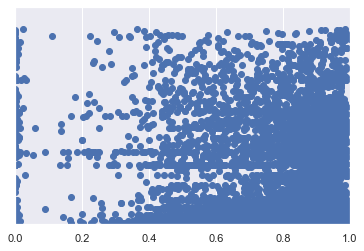

In [28]:
#SCATTER PLOT BEFORE KMEANS CLUSTERING

plt.scatter(studiosDFClean['Completion Percentage'],studiosDFClean['Studio 1'])
plt.xlim(0,1)
plt.ylim(0, 700)
plt.yticks([])
plt.show()

## ENCODING

In [29]:
#LABEL ENCODING STUDIOS COLUMN VALUES TO BECOME MULTICLASS FOR KMEANS ANALYSIS

lab_enc = preprocessing.LabelEncoder()
studios_encoded = lab_enc.fit_transform(studiosDFClean['Studio 1'])
print(studios_encoded)
print(utils.multiclass.type_of_target(studios_encoded))
print(utils.multiclass.type_of_target(studios_encoded.astype('int')))
print(utils.multiclass.type_of_target(studios_encoded))

[514  79 277 ... 348   4 514]
multiclass
multiclass
multiclass


In [30]:
#INITIALISE X AND Y

X = studios_encoded.reshape(-1,1)
y = studiosDFClean['Completion Percentage']

## ELBOW TEST FOR APPROPRIATE K-MEANS VALUE

Text(0.5, 1.0, 'Elbow Method For Optimal k')

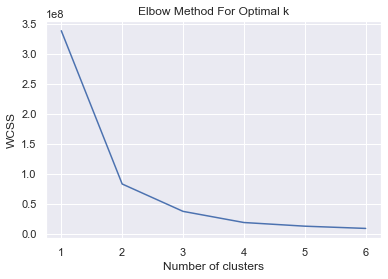

In [31]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')

## K-MEANS ALGORITHM

In [32]:
kmeans = KMeans(3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [33]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([0, 1, 2, ..., 2, 1, 0], dtype=int32)

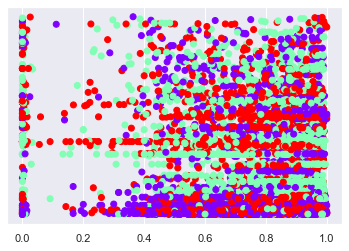

In [34]:
data_with_clusters = studiosDFClean.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Completion Percentage'],data_with_clusters['Studio 1'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.yticks([])
plt.show()

In [35]:
studiosDFClean.insert(0, "Cluster", identified_clusters, True)

In [36]:
#ILLUSTRATING NEW DATAFRAME

studiosDFClean.head()

,Cluster,Studio 1,Completion Percentage
0,0,Sunrise,0.879720
1,1,Bones,0.987182
2,2,Madhouse,0.897122
3,0,Sunrise,0.814715
4,0,Toei Animation,0.796038


## SPLITTING INDIVIDUAL CLUSTERS WITH ANALYSIS

In [37]:
#CREATING CLUSTER 0 DATAFRAME WITH CLUSTER 0 VALUES

Cluster0DF = studiosDFClean.query('Cluster == 0')
print(Cluster0DF)

       Cluster        Studio 1  Completion Percentage
0            0         Sunrise               0.879720
3            0         Sunrise               0.814715
4            0  Toei Animation               0.796038
10           0  Studio Pierrot               0.900515
11           0  Toei Animation               0.000102
...        ...             ...                    ...
17519        0        ufotable               0.300000
17536        0      Wit Studio               1.000000
17538        0  Studio Pierrot               1.000000
17549        0    Studio Kafka               0.363636
17561        0         Sunrise               0.000000

[3980 rows x 3 columns]


In [38]:
#CLUSTER 0 STATISTICS

Cluster0DF.describe()

,Cluster,Completion Percentage
count,3980.0,3980.000000
mean,0.0,0.811653
std,0.0,0.187476
min,0.0,0.000000
25%,0.0,0.739524
50%,0.0,0.869337
75%,0.0,0.945641
max,0.0,1.000000


In [39]:
#CREATING CLUSTER 1 DATAFRAME WITH CLUSTER 0 VALUES

Cluster1DF = studiosDFClean.query('Cluster == 1')
print(Cluster1DF)

       Cluster        Studio 1  Completion Percentage
1            1           Bones               0.987182
5            1          Gallop               0.752271
8            1        A.C.G.T.               0.953772
15           1           Gonzo               0.791165
17           1           Gonzo               0.827863
...        ...             ...                    ...
17528        1        Fanworks               0.000000
17532        1         CG Year               0.000000
17552        1           Bones               0.986045
17555        1  Arvo Animation               0.000000
17560        1            8bit               0.400000

[2697 rows x 3 columns]


In [40]:
#CLUSTER 1 STATISTICS

Cluster1DF.describe()

,Cluster,Completion Percentage
count,2697.0,2697.000000
mean,1.0,0.805504
std,0.0,0.202544
min,1.0,0.000000
25%,1.0,0.747662
50%,1.0,0.874832
75%,1.0,0.940514
max,1.0,0.995724


In [41]:
#CREATING CLUSTER 2 DATAFRAME WITH CLUSTER 2 VALUES

Cluster2DF = studiosDFClean.query('Cluster == 2')
print(Cluster2DF)

       Cluster          Studio 1  Completion Percentage
2            2          Madhouse               0.897122
6            2         J.C.Staff               0.779701
7            2  Nippon Animation               0.873463
9            2          Madhouse               0.752634
16           2          Madhouse               0.726134
...        ...               ...                    ...
17524        2  Ruo Hong Culture               0.000000
17537        2             MAPPA               0.000000
17543        2      SILVER LINK.               0.294118
17544        2      SILVER LINK.               0.222222
17558        2          Passione               0.000000

[3651 rows x 3 columns]


In [42]:
#CLUSTER 2 STATISTICS

Cluster2DF.describe()

,Cluster,Completion Percentage
count,3651.0,3651.000000
mean,2.0,0.820432
std,0.0,0.198979
min,2.0,0.000000
25%,2.0,0.777326
50%,2.0,0.887138
75%,2.0,0.949223
max,2.0,1.000000


In [43]:
#UNIQUE AGE RATINGS IN CLUSTER 0

Cluster0DF['Studio 1'].unique()

array(['Sunrise', 'Toei Animation', 'Studio Pierrot', 'Trans Arts',
       'Studio Comet', 'Studio Deen', 'Tokyo Movie Shinsha', 'Xebec',
       'feel.', 'TMS Entertainment', 'Zexcs', 'Telecom Animation Film',
       'ufotable', 'Studio Matrix', 'TNK', 'Studio Fantasia',
       'Studio Ghibli', 'Tokyo Kids', 'Yumeta Company', 'Studio Hibari',
       'Silver', 'Tatsunoko Production', 'Triangle Staff', 'Square Enix',
       'Trinet Entertainment', 'WAO World', 'Studio 4°C', 'animate Film',
       'Topcraft', 'Studio Junio', 'Studio Flag', 'Zero-G Room',
       'SynergySP', 'Studio Rikka', 'Tezuka Productions',
       'Vega Entertainment', 'Y.O.U.C', 'Studio Live', 'Studio Jam',
       'T.P.O', 'View Works', 'Studio Egg', 'Yamato Works',
       'Tamura Shigeru Studio', 'Studio Signal', 'The Answer Studio',
       'Studio 88', 'Sugar Boy', 'Venet', 'Studio Z5', 'Three-d', 'T-Rex',
       'Studio G-1Neo', 'Studio Kelmadick', 'Studio OX',
       'Tsuchida Productions', 'Soeishinsha', 'Telesc

In [44]:
#TOP 5 STUDIOS IN CLUSTER 0

n = 5
Cluster0DF['Studio 1'].value_counts()[:n].index.tolist()

['Toei Animation',
 'Sunrise',
 'TMS Entertainment',
 'Studio Deen',
 'Studio Pierrot']

In [45]:
#UNIQUE STUDIOS IN CLUSTER 1

Cluster1DF['Studio 1'].unique()

array(['Bones', 'Gallop', 'A.C.G.T.', 'Gonzo', 'Gainax', 'Bee Train',
       'AIC', 'Hal Film Maker', 'Digital Frontier', 'Daume', 'Group TAC',
       'Asread', 'Arms', 'APPP', 'Chaos Project', 'AIC Spirits',
       'CoMix Wave Films', 'Ajia-Do', 'Annapuru', 'E&G Films', 'AIC ASTA',
       'Actas', 'G&G Entertainment', 'Ashi Production', 'Arcs Create',
       'Artland', "Brain's Base", 'Eiken', 'Creators Dot Com', 'Diomedéa',
       'Enoki Films', 'Doga Kobo', 'Agent 21', 'ACC Production',
       'Bee Media', 'Darts', 'D.A.S.T.', 'Azeta Pictures', 'AT-2',
       'Artmic', 'Asahi Production', 'Dynamic Planning',
       'Academy Productions', 'Echo', 'Ginga Ya',
       'Filmlink International', 'Genco', 'Front Line', 'Anime R',
       'Aubec', 'Big Bang', 'Himajin Planning', 'A-1 Pictures',
       'Animation 21', 'Flavors Soft', 'Arcturus', 'Animation Staff Room',
       'Dongwoo A&E', 'CyberConnect2', 'Anpro', 'Anime Antenna Iinkai',
       'DLE', 'Blue Cat', 'GEN Productions', 'DAX Pro

In [46]:
#TOP 5 STUDIOS IN CLUSTER 1

n = 5
Cluster1DF['Studio 1'].value_counts()[:n].index.tolist()

['A-1 Pictures', 'DLE', 'Gonzo', 'AIC', 'Bones']

In [47]:
#UNIQUE STUDIOS IN CLUSTER 2

Cluster2DF['Studio 1'].unique()

array(['Madhouse', 'J.C.Staff', 'Nippon Animation', 'OLM',
       'Production I.G', 'Nomad', 'Kyoto Animation', 'Seven Arcs',
       'Imagin', 'Production Reed', 'Pastel', 'Satelight', 'Manglobe',
       'Palm Studio', 'Shin-Ei Animation', 'Radix', 'Magic Bus', 'Shaft',
       'M.S.C', 'Picture Magic', 'Milky Animation Label', 'Plum',
       'Karaku', 'KSS', 'Pink Pineapple',
       'Shogakukan Music & Digital Entertainment', 'Shinkuukan', 'Planet',
       'OLM Digital', 'Remic', 'Phoenix Entertainment', 'Mook Animation',
       'Oh! Production', 'Romanov Films', 'Kaname Productions',
       'Mushi Production', 'Ishimori Entertainment', 'JCF',
       'Office Take Off', 'Rikuentai', 'Kitty Films', 'RAMS',
       'Public & Basic', 'Image House', 'Ishikawa Pro', 'Mook DLE',
       'Pierrot Plus', 'Sanrio', 'P.A. Works', 'Lilix', 'PPM', 'Oxybot',
       'Khara', 'Shochiku Animation Institute', 'Panmedia', 'Japan Taps',
       'Piko Studio', 'Kazuki Production', 'PrimeTime', 'Shirogumi',
  

In [48]:
#TOP 5 STUDIOS IN CLUSTER 2

n = 5
Cluster2DF['Studio 1'].value_counts()[:n].index.tolist()

['J.C.Staff', 'Madhouse', 'Production I.G', 'OLM', 'Nippon Animation']

<AxesSubplot:xlabel='Cluster', ylabel='Completion Percentage'>

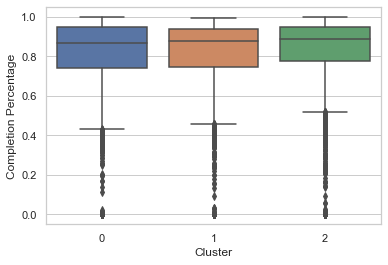

In [49]:
#COMBINED BOXPLOT OF THE 3 CLUSTERS

sb.set_style("whitegrid")
  
sb.boxplot(x = 'Cluster', y = 'Completion Percentage', data = studiosDFClean)

### Cluster 2 seems to be the best cluster due to its highest Median Completion Percentage as well as its smallest Inter-Quartile Range. J.C Staff, Madhouse, Production I.G, OLM and Nippon Animation are the top 5 most prominent studios in Cluster 2 when it comes to number of anime produced.

## SILHOUETTE ANALYSIS FOR ACCURACY OF K-CLUSTERS

For n_clusters = 3 The average silhouette_score is : 0.7188541797952277
For n_clusters = 4 The average silhouette_score is : 0.5825308202638994
For n_clusters = 5 The average silhouette_score is : 0.4029400287881206
For n_clusters = 6 The average silhouette_score is : 0.3088229206176786
For n_clusters = 7 The average silhouette_score is : 0.320277063738136


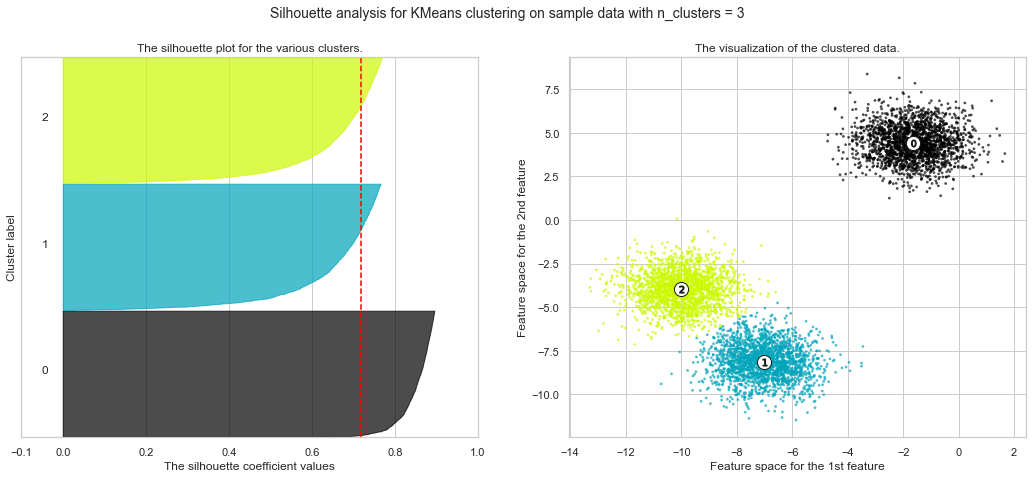

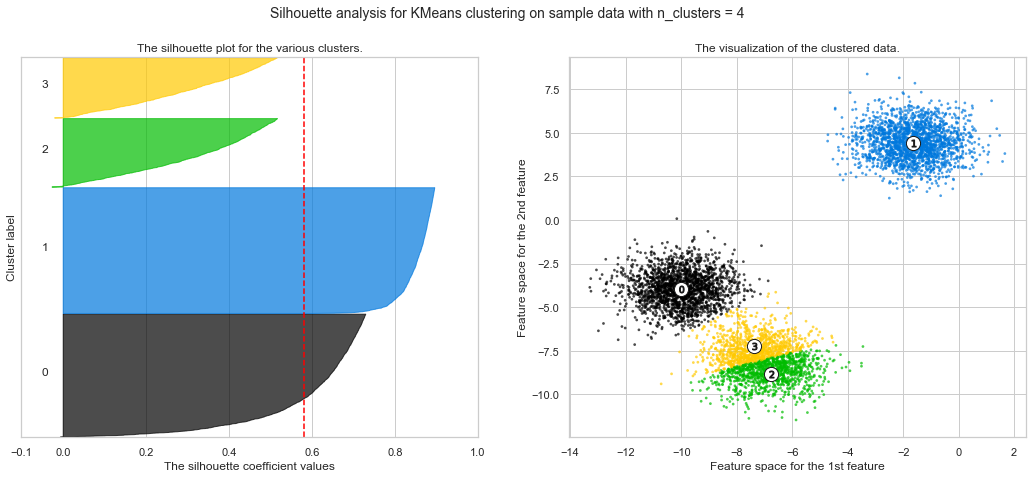

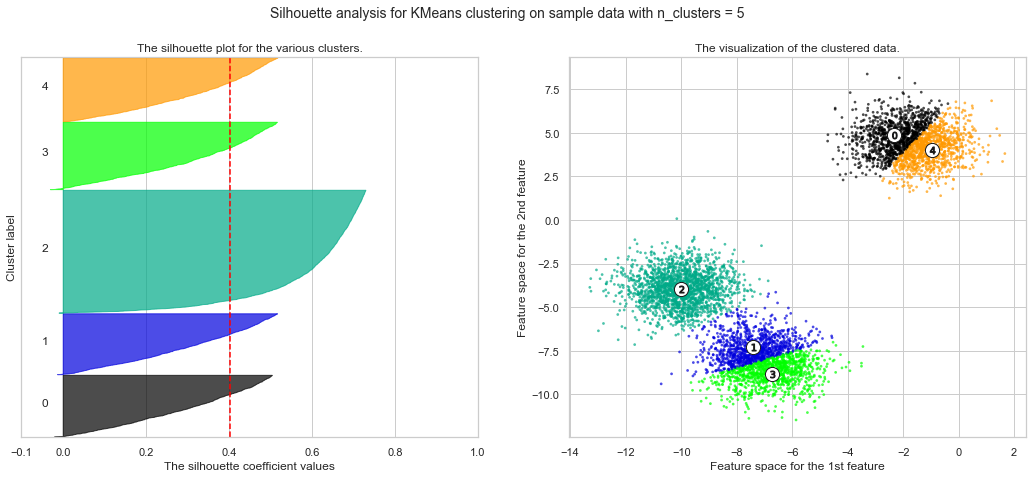

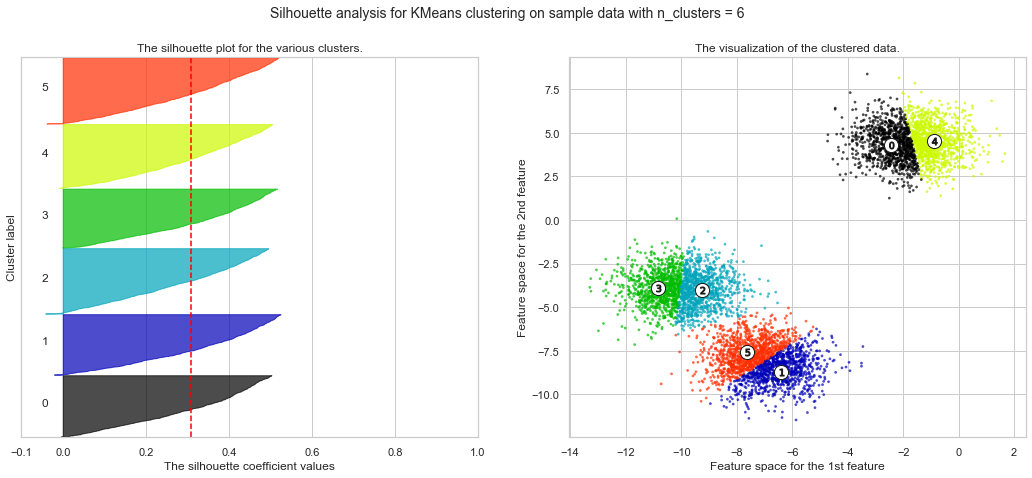

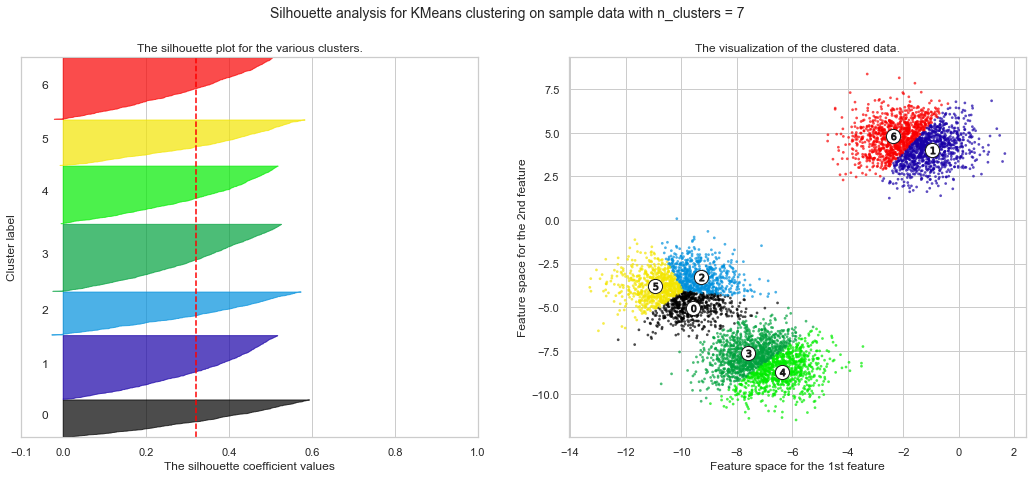

In [70]:
range_n_clusters = [3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18,7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14)

### Our clusters using K=3 as the K-Value has the highest Silhouette Score among other clusters of differing K. Hence, this highlights the accuracy of our clustering as high Silhouette Score suggests that clusters are sufficiently spaced out from one another and are of appropriate size